In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
global_temp = pd.read_csv("GlobalTemperatures.csv")

In [42]:
global_temp['Year'] =pd.to_datetime(global_temp['dt']).dt.year 

In [49]:
Uncertainty = global_temp.groupby('Year')['LandAverageTemperatureUncertainty'].mean().reset_index()

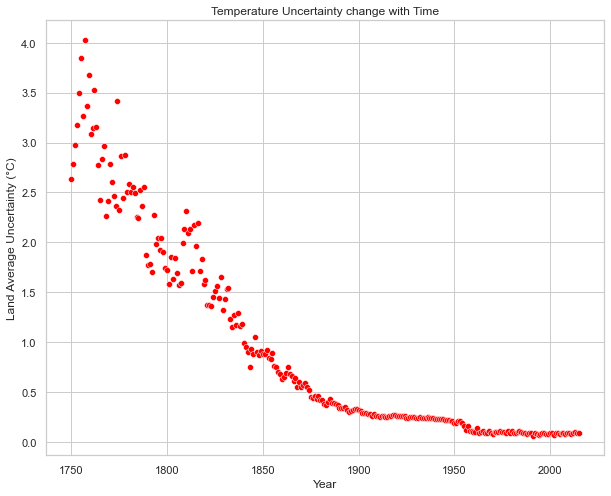

In [58]:
fig,ax=plt.subplots(figsize=(10,8))
sns.set(style="whitegrid")
sns.scatterplot(x=Uncertainty['Year'],y=Uncertainty['LandAverageTemperatureUncertainty'],data=Uncertainty,color='red')
ax.set_ylabel('Land Average Uncertainty (°C)')
ax.set_title('Temperature Uncertainty change with Time');

In [69]:
global_temp.loc[global_temp['Year']<1970,'Period']  = 'Before 1970'
global_temp.loc[global_temp['Year']>1970,'Period']  = 'After 1970'

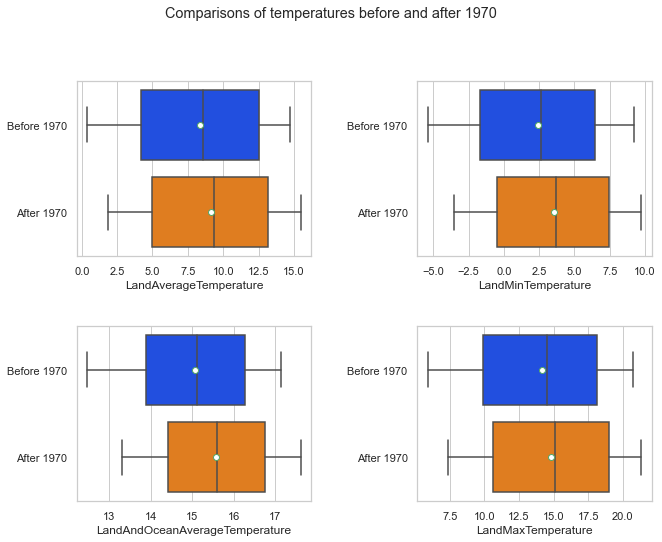

In [108]:
global_temp=global_temp.dropna()
fig,ax=plt.subplots(2,2,figsize=(10,8))

sns.set_style("whitegrid")

sns.boxplot(ax=ax[0, 0],x="LandAverageTemperature",y="Period", data=global_temp,
            showmeans=True,meanprops={"marker":"o","markerfacecolor":"white"},palette='bright')

sns.boxplot(ax=ax[1, 1],x="LandMaxTemperature",y="Period", data=global_temp,
            showmeans=True,meanprops={"marker":"o","markerfacecolor":"white"},palette='bright')

sns.boxplot(ax=ax[0, 1],x="LandMinTemperature",y="Period", data=global_temp,
            showmeans=True,meanprops={"marker":"o","markerfacecolor":"white"},palette='bright')

sns.boxplot(ax=ax[1, 0],x="LandAndOceanAverageTemperature",y="Period", data=global_temp
            ,showmeans=True,meanprops={"marker":"o","markerfacecolor":"white"},palette='bright')

fig.suptitle('Comparisons of temperatures before and after 1970');
ax[1, 0].set(ylabel=None);
ax[0, 0].set(ylabel=None);
ax[1, 1].set(ylabel=None);
ax[0, 1].set(ylabel=None);
fig.tight_layout(pad=3.0)